# Visualise sustainability scores across time and industries

**Notes on Sustainalytics ESG Risk Ratings**

"The ESG Risk Rating provides investors with an overall company score based on an assessment of how much of a company’s exposure to ESG risk is unmanaged. The more of this risk that is unmanaged, then the higher the ESG Risk Rating score.

Unmanageable risk is the portion of a company’s exposure score that remains a risk to the company regardless of its management practices. For example, tobacco companies cannot fully eliminate the health risks associated with their products. Manageable risk is the portion of a company’s exposure score that can be managed through its policies and programmes.

A company’s ESG Risk Rating score is the sum of unmanaged risk for each of the company’s MEIs. The unmanaged risk of an MEI is calculated as exposure minus managed risk." ([Sustainalytics, 2020](https://connect.sustainalytics.com/hubfs/SFS/Sustainalytics%20ESG%20Risk%20Ratings_Issuer%20Backgrounder.pdf)).

## Set up

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read data
peer_data = pd.read_csv("peer_data.csv", parse_dates=["timestamp"])
symbol_data = pd.read_csv("symbol_data.csv", parse_dates=["timestamp"])

In [3]:
# check it works
peer_data.head()

,timestamp,esgScore,governanceScore,environmentScore,socialScore,ticker,peer_group
0,2014-09-01,57.272727,64.236364,51.345455,58.036364,TGT,Retailing
1,2014-10-01,57.357143,64.285714,51.446429,58.125000,TGT,Retailing
2,2014-11-01,57.357143,64.285714,51.446429,58.107143,TGT,Retailing
3,2014-12-01,57.267857,64.285714,51.285714,58.125000,TGT,Retailing
4,2015-01-01,57.250000,64.410714,51.196429,58.000000,TGT,Retailing


In [4]:
peer_data.ticker.unique()

array(['TGT', 'PEP', 'AMT', 'UNH', 'VZ', 'ELV', 'ANTM', 'RMS.PA'],
      dtype=object)

In [5]:
peer_data.peer_group.unique()

array(['Retailing', 'Food Products', 'Real Estate', 'Healthcare',
       'Telecommunication Services',
       'Canada Fund Emerging Markets Equity', 'Textiles & Apparel'],
      dtype=object)

## Visualise company and industry data across time

### ESG Score from 2014 to 2022, broken down by ticker

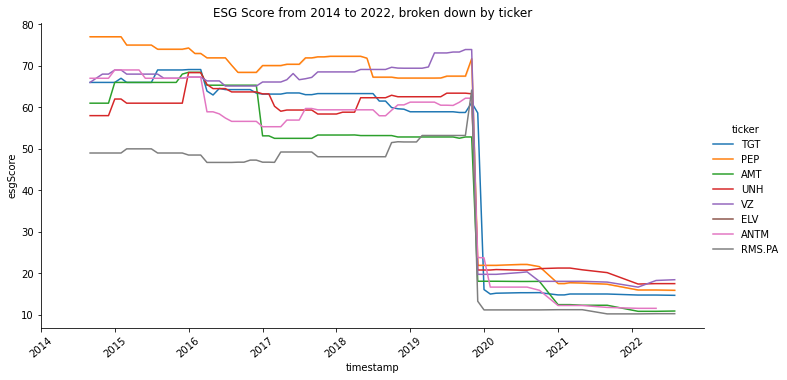

In [6]:
ax = sns.relplot(
    data=symbol_data, x="timestamp", y="esgScore",
    hue="ticker",
    kind="line", aspect=2
)

ax.set_xticklabels(rotation=40) # rotate x axis labels to fit plot
plt.title("ESG Score from 2014 to 2022, broken down by ticker")
plt.show()

### ESG Score from 2014 to 2022, broken down by peer group (i.e. industry)

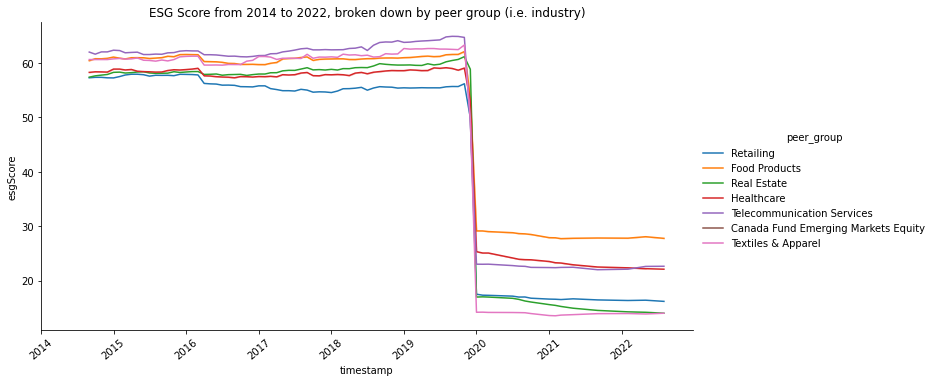

In [7]:
ax = sns.relplot(
    data=peer_data, x="timestamp", y="esgScore",
    hue="peer_group",
    kind="line", aspect=2
)

ax.set_xticklabels(rotation=40) # rotate x axis labels to fit plot
plt.title("ESG Score from 2014 to 2022, broken down by peer group (i.e. industry)")
plt.show()

## Dramatic change in scores in 2020

The scores change dramatically at 2020 and started coming in every few months instead of every month, likely due to Sustainalytics changing their ESG risk scoring methodology.

Regarding the difference between the current ESG Risk Rating and the legacy ESG Rating: "Although both scores use a range of 0-100, a lower score in the ESG Risk Rating is better than a higher score, whereas for the ESG Rating a higher score is better than a lower score. It is important to keep in mind that the scores were designed to capture different dimensions of a company’s ESG performance. The ESG Risk Rating score reflects how much of a company’s exposure to ESG risk is unmanaged. The ESG Rating score reflects how well a company is managing its material ESG issues." ([Sustainalytics, 2020](https://connect.sustainalytics.com/hubfs/SFS/Sustainalytics%20ESG%20Risk%20Rating%20-%20FAQs%20for%20Corporations.pdf)).

Will take just the ESG scores from 1 Jan 2020 onwards. Frustrating because it's difficult to find information about the legacy scoring system on Sustainalytics (even after giving them my personal information just to get that paragraph above), and the lack of 2019 data and the prior years means it's difficult to account for Covid-19's potential effects on the companies' sustainability risk performance.

In [8]:
symbol_after2020 = symbol_data[symbol_data.timestamp >= "2020-01-01"]

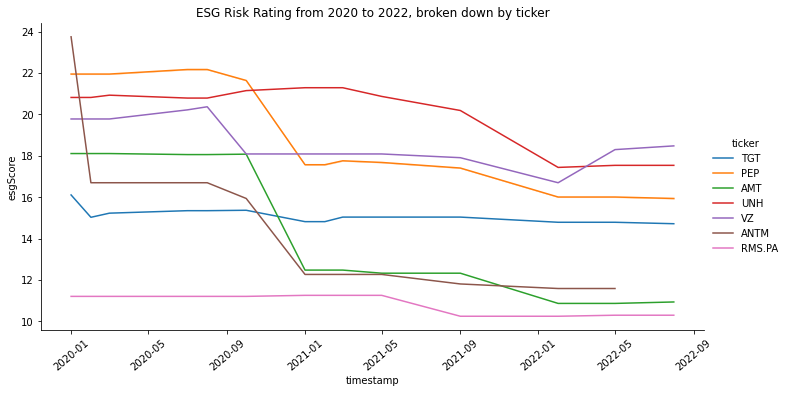

In [9]:
ax = sns.relplot(
    data=symbol_after2020, x="timestamp", y="esgScore",
    hue="ticker",
    kind="line", aspect=2
)

ax.set_xticklabels(rotation=40)
plt.title("ESG Risk Rating from 2020 to 2022, broken down by ticker")
plt.show()

In [10]:
peer_after2020 = peer_data[peer_data.timestamp >= "2020-01-01"]

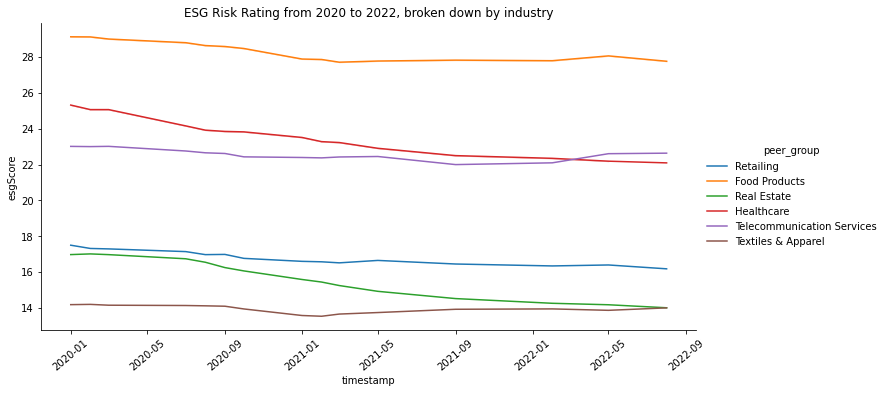

In [11]:
ax = sns.relplot(
    data=peer_after2020, x="timestamp", y="esgScore",
    hue="peer_group",
    kind="line", aspect=2
)

ax.set_xticklabels(rotation=40)
plt.title("ESG Risk Rating from 2020 to 2022, broken down by industry")
plt.show()

## Benchmark each company against its industry

Need to transform our two datasets:
- Unpivot four columns of scores into one
- Join them together

Assuming that each peer group has the same ESG scores. Doesn't matter in this case because based on the below table, it seems like each company in our peer series dataset is in a different industry, but something to check out later.

Also looks like "Canada Fund Emerging Markets Equity" was a peer group that existed before 2020, with Sustainalytics' legacy scoring system, because it's gone now.

In [12]:
peer_after2020[["ticker", "peer_group"]].value_counts().reset_index(name="count")

,ticker,peer_group,count
0,PEP,Food Products,64
1,AMT,Real Estate,32
2,RMS.PA,Textiles & Apparel,32
3,TGT,Retailing,32
4,UNH,Healthcare,32
5,VZ,Telecommunication Services,32
6,ANTM,Healthcare,29


### Joining the datasets together

In [13]:
symbol_after2020["series_type"] = "company"
peer_after2020["series_type"] = "peer group"
after2020 = pd.concat([symbol_after2020, peer_after2020])
after2020

C:\Users\TzeMin\AppData\Local\Temp/ipykernel_19956/690623981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_after2020["series_type"] = "company"
C:\Users\TzeMin\AppData\Local\Temp/ipykernel_19956/690623981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peer_after2020["series_type"] = "peer group"


,timestamp,esgScore,governanceScore,environmentScore,socialScore,ticker,peer_group,series_type
64,2020-01-01,16.110000,5.370000,1.900000,8.840000,TGT,Retailing,company
65,2020-02-01,15.030000,5.110000,1.900000,8.030000,TGT,Retailing,company
66,2020-03-01,15.230000,5.110000,1.900000,8.230000,TGT,Retailing,company
67,2020-04-01,NaN,NaN,NaN,NaN,TGT,Retailing,company
68,2020-05-01,NaN,NaN,NaN,NaN,TGT,Retailing,company
...,...,...,...,...,...,...,...,...
761,2022-04-01,NaN,NaN,NaN,NaN,PEP,Food Products,peer group
762,2022-05-01,28.063696,6.393933,10.497079,10.959663,PEP,Food Products,peer group
763,2022-06-01,NaN,NaN,NaN,NaN,PEP,Food Products,peer group
764,2022-07-01,NaN,NaN,NaN,NaN,PEP,Food Products,peer group


### Unpivoting score columns

In [14]:
aft2020 = pd.melt(
    after2020, id_vars=["timestamp", "ticker", "series_type"], 
    value_vars=["esgScore", "governanceScore", "environmentScore", "socialScore"],
    var_name="score_dimension",
    value_name="score"
)
aft2020

,timestamp,ticker,series_type,score_dimension,score
0,2020-01-01,TGT,company,esgScore,16.110000
1,2020-02-01,TGT,company,esgScore,15.030000
2,2020-03-01,TGT,company,esgScore,15.230000
3,2020-04-01,TGT,company,esgScore,NaN
4,2020-05-01,TGT,company,esgScore,NaN
...,...,...,...,...,...
2019,2022-04-01,PEP,peer group,socialScore,NaN
2020,2022-05-01,PEP,peer group,socialScore,10.959663
2021,2022-06-01,PEP,peer group,socialScore,NaN
2022,2022-07-01,PEP,peer group,socialScore,NaN


### Charting time

Note that some months' scores are NA. Only markers on the line plots are available for non-NA data.

#### TGT vs its peer group, Retailing

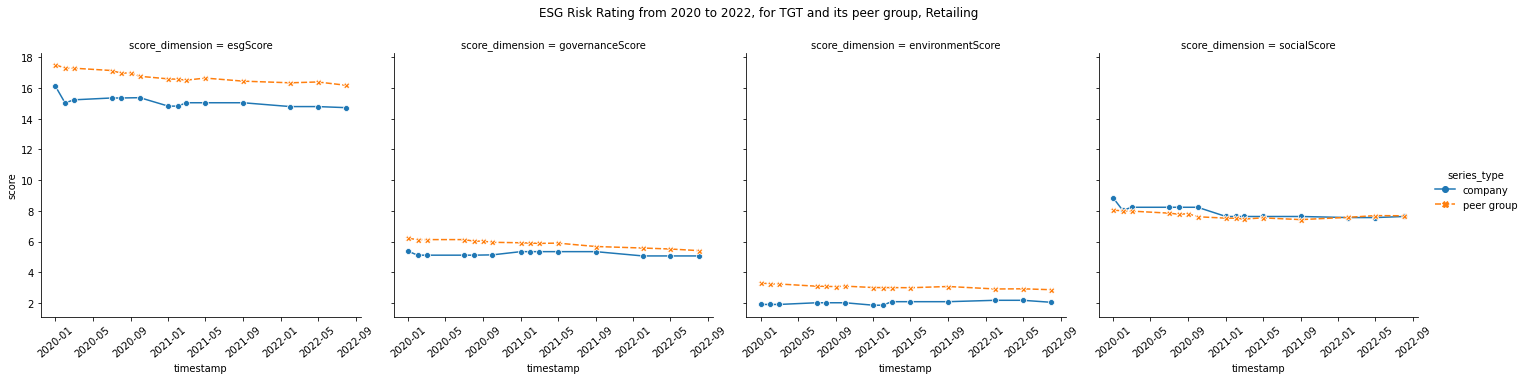

In [36]:
TGT_aft2020 = aft2020[aft2020.ticker == "TGT"]

ax = sns.relplot(
    data=TGT_aft2020, x="timestamp", y="score",
    hue="series_type", col="score_dimension",
    kind="line", style="series_type", markers=True
)

ax.set_xticklabels(rotation=40)
ax.fig.suptitle("ESG Risk Rating from 2020 to 2022, for TGT and its peer group, Retailing") # add overall title
plt.subplots_adjust(top=0.85) # adjust the subplots lower, so it doesn't overlap with the title
plt.show()

#### Let's make this a charting function, it's too much effort to rewrite this script

In [15]:
mapping = peer_after2020[["ticker", "peer_group"]].value_counts().reset_index(name="count")
mapping

,ticker,peer_group,count
0,PEP,Food Products,64
1,AMT,Real Estate,32
2,RMS.PA,Textiles & Apparel,32
3,TGT,Retailing,32
4,UNH,Healthcare,32
5,VZ,Telecommunication Services,32
6,ANTM,Healthcare,29


In [16]:
def plot_esgratings(ticker):
    ticker_aft2020 = aft2020[aft2020.ticker == ticker]

    ax = sns.relplot(
        data=ticker_aft2020, x="timestamp", y="score",
        hue="series_type", col="score_dimension",
        kind="line", style="series_type", markers=True
    )
    
    peer_group = mapping[mapping.ticker == ticker].reset_index().loc[0, "peer_group"]
    title = "ESG Risk Rating from 2020 to 2022, for " + ticker + " and its peer group, " + peer_group
    
    ax.set_xticklabels(rotation=40)
    ax.fig.suptitle(title) # add overall title
    plt.subplots_adjust(top=0.85) # adjust the subplots lower, so it doesn't overlap with the title
    plt.show()

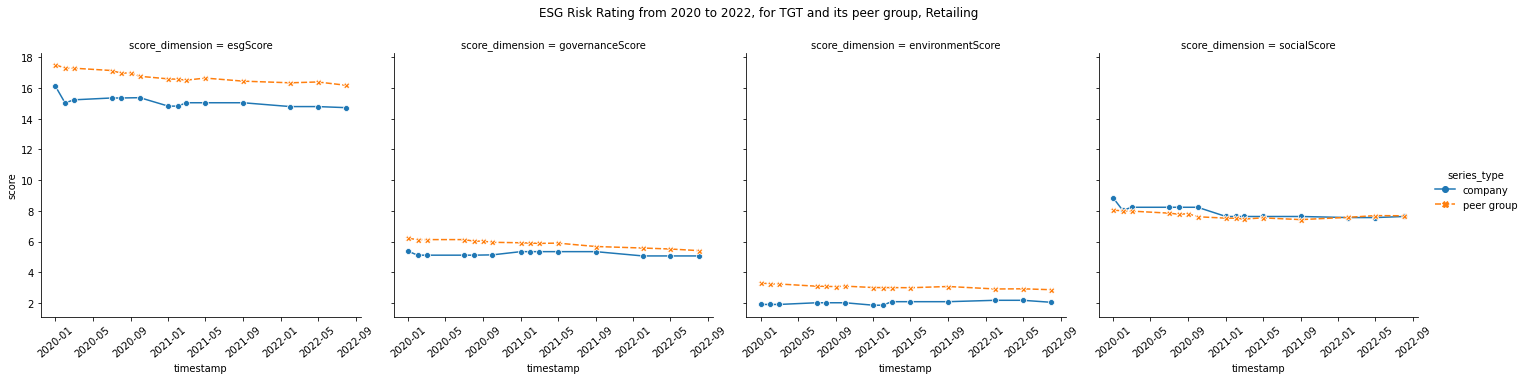

In [64]:
# draw charts
plot_esgratings("TGT")

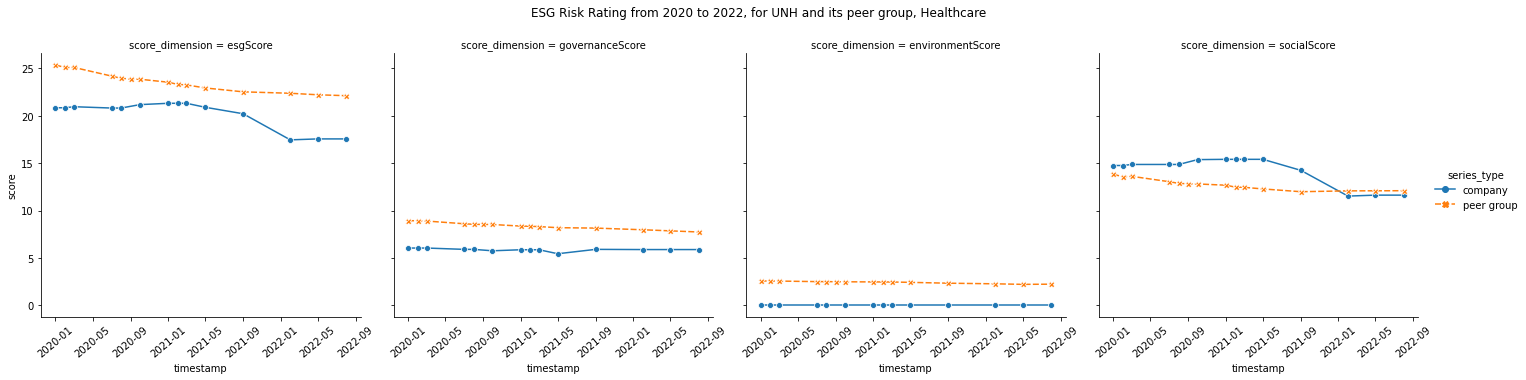

In [65]:
plot_esgratings("UNH")

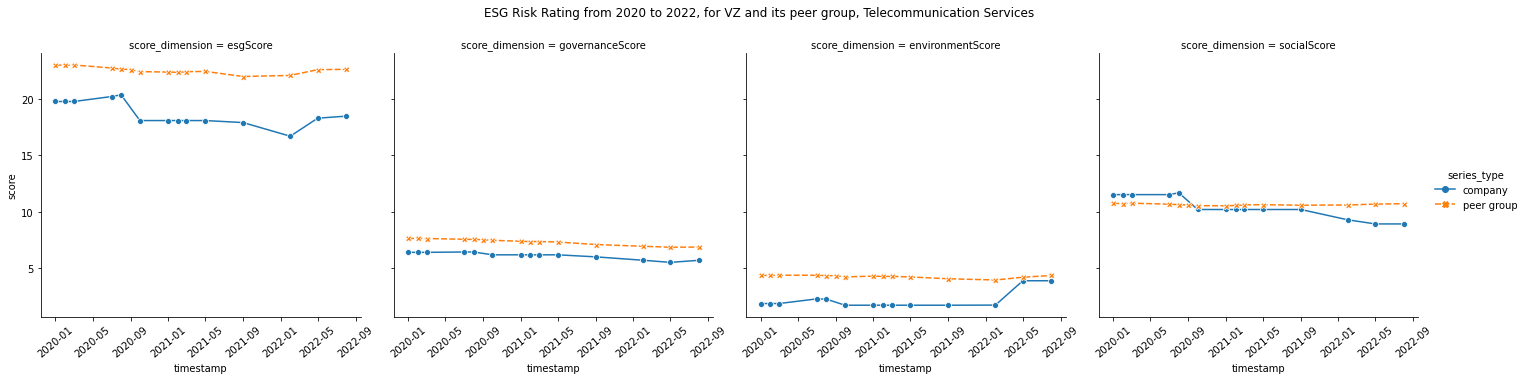

In [66]:
plot_esgratings("VZ")

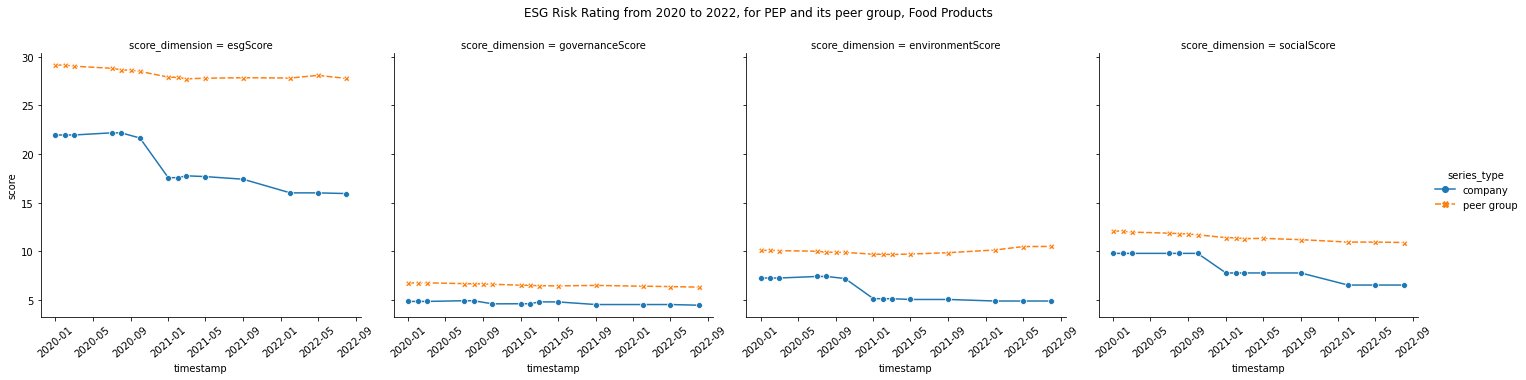

In [67]:
plot_esgratings("PEP")

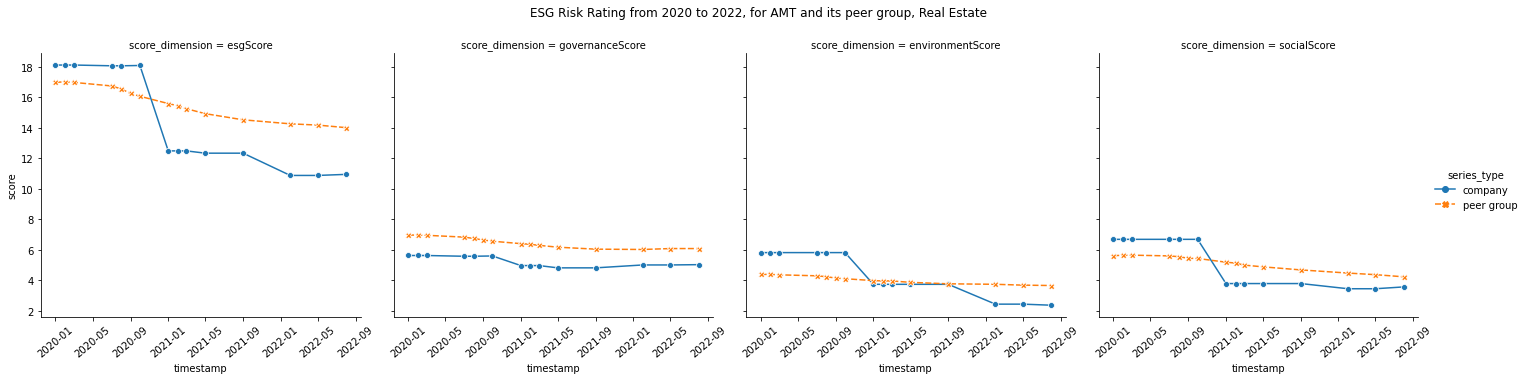

In [68]:
plot_esgratings("AMT")

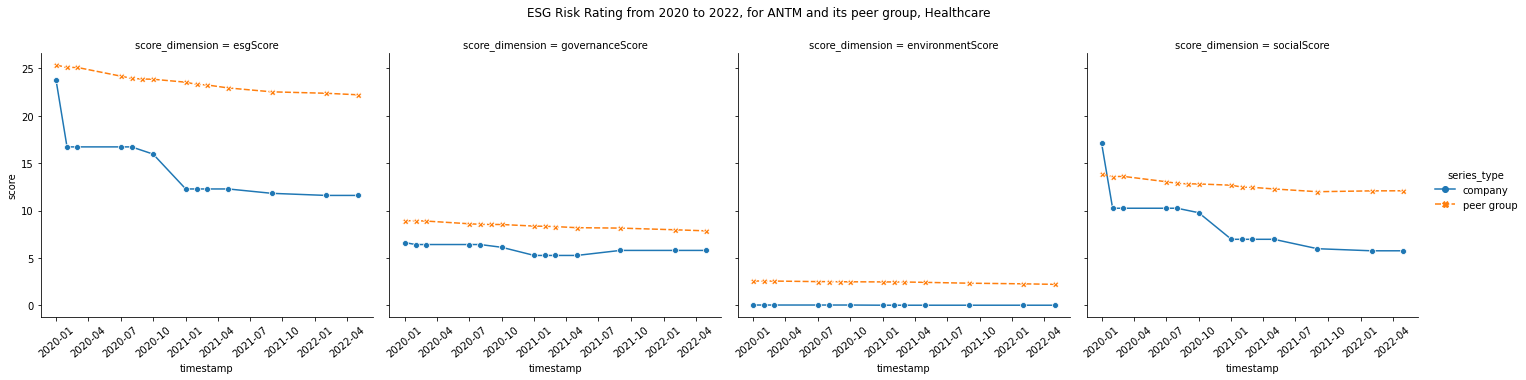

In [84]:
plot_esgratings("ANTM")

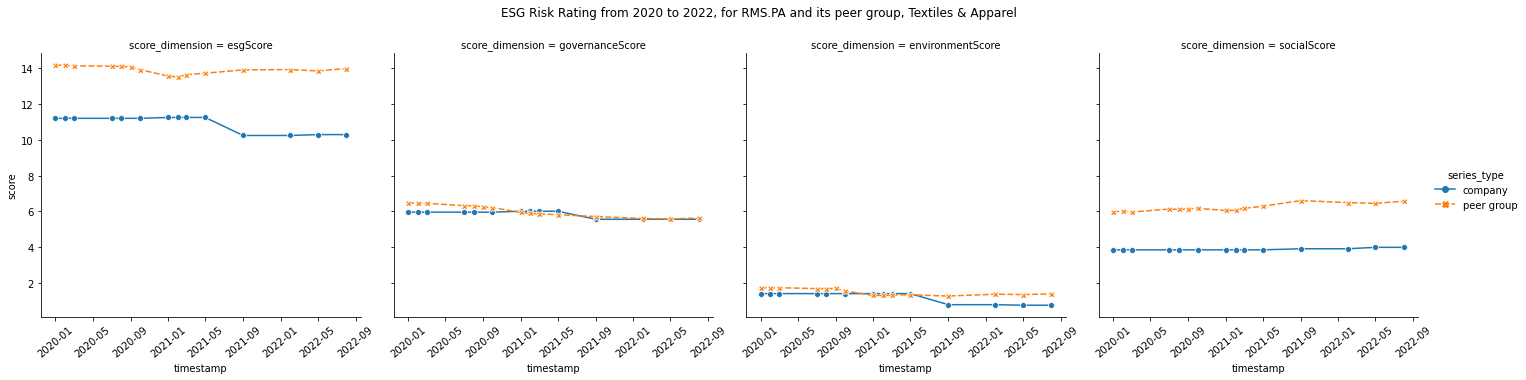

In [14]:
plot_esgratings("RMS.PA")

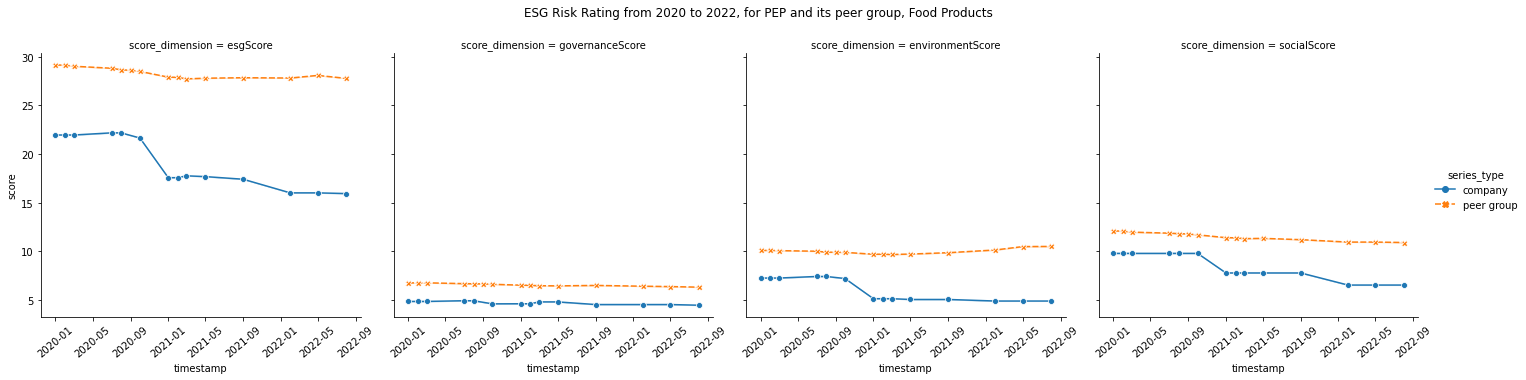

In [17]:
plot_esgratings("PEP")